# Balancer Simulations Math Challenge - Basic Exercises

This is a series of exercises to gain intuition for the core algorithm in Balancer Pools: the Value Function, and invariant V.  
For all steps the Balancer Whitepaper will be useful: https://balancer.fi/whitepaper.pdf

**Exercise:** We'll work on Step 1 questions in our working session on May 25 in teams of 2, facilitated by @Octopus and @akrtws.  
**Challenges:** Step 2 will be homework assignments, submitting at least one challenge solved is mandatory for successful participation!  
Here's the notebook with challenges: https://github.com/TokenEngineeringCommunity/BalancerPools_Model/blob/fcb67145e8b0f8a1843fe3c6921dbb5a7085938e/Math%20Challenges-Advanced.ipynb

## Exercise:   
Let's set up a pool.  

We have 100 Token A and 100 Token B, with equal weights.  
The price definition in our pool is constraint by the
Invariant V in Balancer Pools. 

a_bal = balance of token A  
b_bal = balance of token B  
a_weight = weight of token A  
b_weight = weight of token B   

The weights in this pool are equal for both tokens.

**For now, we don't have a swap fee.**

# Q1.1: 
What's the initial spot price of token A in token B?

In [1]:
#The initial spot price is 1:1, 1 token A equals 1 token B.

# Q1.2:
Now let's assume a series of 99 swaps. With every swap, **1.0 token A is bought from the pool, against token B**.  

## buy_A table
with:<br>

    the token A balances (swap by swap)
    the token B balances (swap by swap) - that are constraint by the value function. 

In mathematics, **an invariant** is a property of a mathematical object (or a class of mathematical objects) which remains unchanged after operations or transformations of a certain type are applied to the objects.

In [2]:
import numpy as np
import pandas as pd

import plotly.express as px
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot

import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

In [3]:
#set up genesis state
a_bal = 100 # initial balance
b_bal = 100 # initial balance

a_weight = 0.5 #define weight
b_weight = 0.5 #define weight

s_f = 0.0 #swap fee
inv = (a_bal**a_weight)*(b_bal**b_weight) #calculate invariant

a_vals = pd.Series(range(100,0,-1))

#create dataframe with based on a_vals
buy_A = pd.DataFrame(a_vals, columns=['token_A'])

buy_A['invariant'] = inv #value required to calculate token B value

#create values for plot, add Y_balances according to current invariant
buy_A['token_B'] = (buy_A.invariant/(buy_A.token_A**a_weight))**(1/b_weight)# calculate corresponding token_B value according to invariant

buy_A.tail()
# buy_A.shape

,token_A,invariant,token_B
95,5,100.0,2000.000000
96,4,100.0,2500.000000
97,3,100.0,3333.333333
98,2,100.0,5000.000000
99,1,100.0,10000.000000


## Swap once vs multiple times

- Invariant V
<div align="center">$V = \prod\limits_{t} {B_t}^{W_{t}}
= a^{w_a}b^{w_b}$</div>

- Number of token B 

<div align="center">
$
b = \left( \frac{V}{a^{w_a}} \right)^{1/w_b}
$
</div>

- **99 token_A at once swap**, meaning only 1 token_A left after that 1 swap, number of token B after that swap is calculated by 
<div align="center">
$
b = \left( \frac{V}{1^{w_a}} \right)^{1/w_b} = V^2
$
</div>

- **99 swaps, 1 token_A each** 
    - Genesis state: 
<div align="center">
    $a_0 = a_{bal}$ <br>
    $b_0 = b_{bal}$
</div>
 
    - 1st swap: 
<div align="center">
    $b_1  = \left( \frac{V}{(a_{bal}-1)^{w_a}} \right)^{1/w_b}$
</div>
  
<div align="center">
    $\Delta b_1 =  b_1 - b_0 =
    \left( \frac{V}{(a_{bal}-1)^{w_a}} \right)^{1/w_b}- 
    \left( \frac{V}{(a_{bal})^{w_a}} \right)^{1/w_b}$
</div>
    
    - 2nd swap: 
<div align="center">
    $b_2 = \left( \frac{V}{(a_{bal}-2)^{w_a}} \right)^{1/w_b}$
</div>
  
<div align="center">
    $\Delta b_2 = b_2 - b_1=
    \left( \frac{V}{(a_{bal}-2)^{w_a}} \right)^{1/w_b}- 
    \left( \frac{V}{(a_{bal}-1)^{w_a}} \right)^{1/w_b}$
</div>

...

    - 99th swap: 
<div align="center">
    $b_{99} = \left( \frac{V}{(a_{bal}-99)^{w_a}} \right)^{1/w_b}$
</div>
  
<div align="center">
    $\Delta b_{99} =  b_{99} - b_{98} =
    \left( \frac{V}{(a_{bal}-99)^{w_a}} \right)^{1/w_b}- 
    \left( \frac{V}{(a_{bal}-98)^{w_a}} \right)^{1/w_b}$
</div>

    - After 99 swaps
<div align="center">
$
b_{99} = b_0 + \sum_{i=1}^{99} \Delta b =
\left( \frac{V}{(a_{bal}-99)^{w_a}} \right)^{1/w_b} = V^2
$	
</div>


**Generalize the problem: with the given value of number of token_A in the pool, there will be only one value for number of token_B that fulfills invariant V requirement, regardless of how many swaps to come to that state**

## Effective Price
According to the [Whitepaper](https://balancer.fi/whitepaper.pdf)

 
 <div align="center">
    $
    EP = \frac{\Delta B}{\Delta A}
    $
</div>

Let's visualize that

In [4]:
# Calculate SP and EF
buy_A['SP'] = (buy_A['token_B']/b_weight) / (buy_A['token_A']/a_weight)
buy_A['delta_A'] = -buy_A['token_A'].diff()
buy_A['delta_B'] = buy_A['token_B'].diff()

buy_A['EP'] = buy_A['delta_B']/buy_A['delta_A']
buy_A.tail(20)

,token_A,invariant,token_B,SP,delta_A,delta_B,EP
80,20,100.0,500.000000,25.000000,1.0,23.809524,23.809524
81,19,100.0,526.315789,27.700831,1.0,26.315789,26.315789
82,18,100.0,555.555556,30.864198,1.0,29.239766,29.239766
83,17,100.0,588.235294,34.602076,1.0,32.679739,32.679739
84,16,100.0,625.000000,39.062500,1.0,36.764706,36.764706
85,15,100.0,666.666667,44.444444,1.0,41.666667,41.666667
86,14,100.0,714.285714,51.020408,1.0,47.619048,47.619048
87,13,100.0,769.230769,59.171598,1.0,54.945055,54.945055
88,12,100.0,833.333333,69.444444,1.0,64.102564,64.102564
89,11,100.0,909.090909,82.644628,1.0,75.757576,75.757576


In [5]:
fig = px.line(x=buy_A["token_A"], y=buy_A["token_B"])

fig.update_xaxes(range = [100,0],
                 title_text='token_A')
fig.update_yaxes(
                 title_text='token_B')


fig.add_shape(type='line',
              x0=20, y0=0,
              x1=20, y1=buy_A['token_B'].loc[buy_A['token_A']==20].values[0],
              line=dict(color='Green',),
              xref='x', yref='y', line_dash="dot"
             )

fig.add_shape(type='line',
              x0=20,    y0=buy_A['token_B'].loc[buy_A['token_A']==20].values[0],
              x1 = 100, y1 = buy_A['token_B'].loc[buy_A['token_A']==20].values[0],
              line=dict(color='Green',),
              xref='x',yref='y',line_dash="dot"
             )

fig.add_shape(type='line',
              x0=5, y0=0,
              x1=5, y1=buy_A['token_B'].loc[buy_A['token_A']==5].values[0],
              line=dict(color='Orange',),
              xref='x', yref='y', line_dash="dot"
             )

fig.add_shape(type='line',
              x0=5,    y0=buy_A['token_B'].loc[buy_A['token_A']==5].values[0],
              x1 = 100, y1 = buy_A['token_B'].loc[buy_A['token_A']==5].values[0],
              line=dict(color='Orange',),
              xref='x',yref='y',line_dash="dot"
             )

fig.add_trace(go.Scatter(x=[20,5,5,20], y=[500,2000,500,500], fill="toself"))
fig.add_annotation(x=3.5, y=1300,
            text="delta_B",
            showarrow=False,)
fig.add_annotation(x=13, y=50,
            text="delta_A",
            showarrow=False,)

fig.update_layout(showlegend=False)
fig.show()

## Spot price


 <div align="center">
    $
SP = \lim_{\Delta A,\Delta B \to 0} EP
    $
</div>

Looking at the curve, Spot price would be represented by a tangent line at that spot *which I find it's hard to imagine and viz*


In [6]:
fig = px.line(x=buy_A["token_A"], y=buy_A["token_B"])

fig.update_xaxes(range = [100,0],
                 title_text='token_A')
fig.update_yaxes(
                 title_text='token_B')


fig.add_trace(go.Scatter(x=[10], y=[1000], ))

fig.add_trace(go.Scatter(mode='lines',
    x=[0,5,10,20],
    y=[2000,1500,1000,0],
    marker=dict(color="Orange", size=5),
))

fig.update_layout(showlegend=False)
fig.show()

- I kind of cheat to draw a tangent line of the curve at (10,1000) with some self-defined points

## EP to SP animation

In [7]:
# Define the known points
x = [10, 1000]
y = [5,2000]

# Calculate the coefficients. This line answers the initial question. 
coefficients = np.polyfit(x, y, 1)
coefficients[0],coefficients[1]

(2.0151515151515156, -15.15151515151473)

In [8]:
a_bal_e = 100 # initial balance
b_bal_e = 100 # initial balance

a_weight_e = 0.5 #define weight
b_weight_e = 0.5 #define weight

s_f = 0.0 #swap fee
inv_e = (a_bal**a_weight)*(b_bal**b_weight) #calculate invariant

a_vals_e = np.linspace(15, 5, num=20)

#create dataframe with based on a_vals
buy_A_e = pd.DataFrame(a_vals_e, columns=['token_A'])

buy_A_e['invariant'] = inv #value required to calculate token B value

#create values for plot, add Y_balances according to current invariant
buy_A_e['token_B'] = (buy_A_e.invariant/(buy_A_e.token_A**a_weight_e))**(1/b_weight_e)# calculate corresponding token_B value according to invariant

buy_A_e
# buy_A.shape

,token_A,invariant,token_B
0,15.000000,100.0,666.666667
1,14.473684,100.0,690.909091
2,13.947368,100.0,716.981132
3,13.421053,100.0,745.098039
4,12.894737,100.0,775.510204
5,12.368421,100.0,808.510638
6,11.842105,100.0,844.444444
7,11.315789,100.0,883.720930
8,10.789474,100.0,926.829268
9,10.263158,100.0,974.358974


In [9]:
import matplotlib
from matplotlib import pyplot as plt
from celluloid import Camera
from IPython.display import HTML

In [10]:
x,y

([10, 1000], [5, 2000])

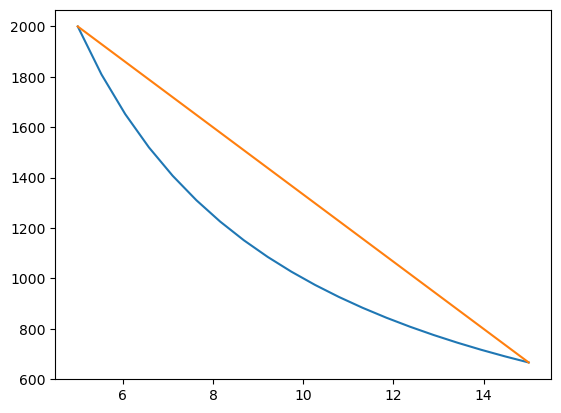

In [11]:
x = [buy_A_e['token_A'][0], buy_A_e['token_B'][0]]
y = [buy_A_e['token_A'][19], buy_A_e['token_B'][19]]


coefficients = np.polyfit(x, y, 1)
a = coefficients[0]
b = coefficients[1]


plt.plot(buy_A_e['token_A'],buy_A_e['token_B'])
plt.plot([x[0],y[0]],[x[1],y[1]])

plt.show()

In [12]:
fig = plt.figure()
camera = Camera(fig)

for i in reversed(range(buy_A_e.shape[0])):
    x = [buy_A_e['token_A'][0], buy_A_e['token_B'][0]]
    y = [buy_A_e['token_A'][i], buy_A_e['token_B'][i]]
#     print(x)
#     print(y)

# Calculate the coefficients. This line answers the initial question. 
#     coefficients = np.polyfit(x, y, 1)
#     plt.gca().invert_xaxis()
    plt.plot(buy_A_e['token_A'],buy_A_e['token_B'], c = 'Blue')
    plt.plot([x[0],y[0]],[x[1],y[1]])
#     ax = plt.axes
    plt.axis([20, 5, 600, 2000])
#     plt.legend(t, [f'line {i}'])
    


    camera.snap()

    
animation = camera.animate()
HTML(animation.to_html5_video())

## Slippage

In [13]:
fig = px.line(x=buy_A["token_A"], y=buy_A["token_B"])

fig.update_xaxes(range = [100,0],
                 title_text='token_A')
fig.update_yaxes(
                 title_text='token_B')


fig.add_trace(go.Scatter(x=[10,5,5,10], y=[1000,2000,1000,1000], ))

fig.add_trace(go.Scatter(mode='lines',
    x=[0,5,10,20],
    y=[2000,1500,1000,0],
    marker=dict(color="Orange", size=5),
))
# fig.add_trace(go.Scatter(mode='markers',
#     x=[10],
#     y=[1000],
#     marker=dict(color="Orange", size=5),
# ))
fig.add_trace(go.Scatter(mode='markers+lines',
    x=[5,5],
    y=[1000,1500],
    marker=dict(color="#31a354", size=5),
    line=dict(color="#31a354", width=3)
                        ))
fig.add_trace(go.Scatter(mode='markers+lines',
    x=[5,5],
    y=[2000,1500],
    marker=dict(color="#8856a7", size=5),
    line=dict(color="#8856a7", width=3)
                        ))

fig.update_layout(showlegend=False)
fig.show()

- This is what I think, please advice
    - I go to the pool to trade, the current state is 10 token_A and 1000 token_B, so SP = 100
    - I want to buy 5 token_A, I look at SP and thought, I need to pay $ 5*100 = 500 $ token_B, represented by <span style="color:#31a354">green line</span>.
    - But in reality, what I need to pay is $ 5*EP = 5*200 = 1000 $, which result  <span style="color:#8856a7">slippage</span>.
    

In [14]:
buy_A_e = buy_A.iloc[[90,95],:][['token_A','token_B']].reset_index(drop = True)

buy_A_e['SP'] = (buy_A_e['token_B']/b_weight) / (buy_A_e['token_A']/a_weight)
buy_A_e['delta_A'] = -buy_A_e['token_A'].diff()
buy_A_e['delta_B'] = buy_A_e['token_B'].diff()

buy_A_e['EP'] = buy_A_e['delta_B']/buy_A_e['delta_A']
buy_A_e

,token_A,token_B,SP,delta_A,delta_B,EP
0,10,1000.0,100.0,NaN,NaN,NaN
1,5,2000.0,400.0,5.0,1000.0,200.0


# Q1.3:

Now let's assume a series of 99 swaps in the opposite direction. We start again with the original state: We have 100 Token A and 100 Token B.   
With every swap, **1.0 token B is bought from the pool, against token A**.

Create a table **'buy_B'** with

    the token A balances (swap by swap)
    the token B balances (swap by swap) - that are constraint by the value function.

In [15]:
#Buy B

b_vals = pd.Series(range(100,0,-1))
#create dataframe with based on b_vals
buy_B = pd.DataFrame(b_vals, columns=['token_B'])
buy_B['invariant'] = inv #value required to calculate token B value

#create values for plot, add a_balances according to current invariant
buy_B['token_A'] = (buy_B.invariant/(buy_B.token_B**b_weight))**(1/a_weight)# calculate corresponding token A value according to invariant

buy_B.tail(30)

,token_B,invariant,token_A
70,30,100.0,333.333333
71,29,100.0,344.827586
72,28,100.0,357.142857
73,27,100.0,370.370370
74,26,100.0,384.615385
75,25,100.0,400.000000
76,24,100.0,416.666667
77,23,100.0,434.782609
78,22,100.0,454.545455
79,21,100.0,476.190476


# Q1.4:
a) What are the new balances of token A and token B after 90 swaps token A (in) for B (out)?  
b) How much would Alice have to pay in token A in case she wants to buy the 91st token B?  

In [16]:
# a) take from table buy_B
buy_B.iloc[91][['token_A', 'token_B']]

token_A    1111.111111
token_B       9.000000
Name: 91, dtype: float64

In [17]:
# b) take from table buy_B
price = (buy_B.iloc[92]['token_A'])-((buy_B.iloc[91]['token_A']))
price

138.88888888888823

In [18]:
# b) calculate with trading function In-Given-Out, see whitepaper

Balance_in = buy_B.iloc[91]['token_A'] 
Balance_out = buy_B.iloc[91]['token_B']
Amount_out = 1 # is 'Given_out' in token B
Amount_in = Balance_in*((Balance_out/(Balance_out-Amount_out))-1)
print(Amount_in)

#note: why deviation in results? Python?

138.8888888888889


# Q1.5:  
Now create a graph (use plotly or similar), and draw the full curve for this series of both kinds of swaps - the AMM curve.

In [19]:
buy_A

,token_A,invariant,token_B,SP,delta_A,delta_B,EP
0,100,100.0,100.000000,1.000000,NaN,NaN,NaN
1,99,100.0,101.010101,1.020304,1.0,1.010101,1.010101
2,98,100.0,102.040816,1.041233,1.0,1.030715,1.030715
3,97,100.0,103.092784,1.062812,1.0,1.051967,1.051967
4,96,100.0,104.166667,1.085069,1.0,1.073883,1.073883
...,...,...,...,...,...,...,...
95,5,100.0,2000.000000,400.000000,1.0,333.333333,333.333333
96,4,100.0,2500.000000,625.000000,1.0,500.000000,500.000000
97,3,100.0,3333.333333,1111.111111,1.0,833.333333,833.333333
98,2,100.0,5000.000000,2500.000000,1.0,1666.666667,1666.666667


In [20]:
buy_A = buy_A.drop(columns=['invariant'])
buy_B = buy_B.drop(columns=['invariant'])

In [21]:
#plot curves with all 

curve = pd.concat([buy_A, buy_B.iloc[::-1]], axis=0, ignore_index=True)
fig = px.line(curve, x="token_A", y="token_B", color_discrete_sequence=px.colors.sequential.Plasma)
fig.update_xaxes(range=[0, 500])
fig.update_yaxes(range=[0, 500])
fig.update_layout(height=1000, width=1000, title_text='<b>AMM Curve</b>')

fig.show()
